<a href="https://colab.research.google.com/github/Inder-Preet-Kaur/Covid19_Project/blob/main/Twitter_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#code to connect with twitter
import tweepy
import csv
import pandas as pd
from tqdm import tqdm, notebook
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

access_token="982180614852919301-qh2ViFmZS6YSCTC27KMlCCjERivQz69"
access_token_secret="PPWeb73sxBwCMgMJydfTF0vRQeljjRGfKGVkOMb31F8MQ"

api_key="P6BzlG4n32lqv8UgKyF4nAmUR"
api_key_secret="EGYxIWfoQur7JHzkzSL23RuKSvSEFib3tkNl8KCnCTJp4eZiQ6"

auth=tweepy.OAuthHandler(consumer_key=api_key,consumer_secret=api_key_secret)
auth.set_access_token(access_token,access_token_secret)

api=tweepy.API(auth)



In [46]:
#reterving tweets for specific time period and specific number of tweets
choice=input("Enter the hashtag: ")

tweets = tweepy.Cursor(api.search, q=choice,lang="en",since = "2020-04-22",
                           until = "2021-11-22",).items(400)
tweets_copy = []
for tweet in tqdm(tweets):
     tweets_copy.append(tweet)
print(f"new tweets retrieved: {len(tweets_copy)}")


Enter the hashtag: #covid-19 #airlines


59it [00:01, 47.77it/s]

new tweets retrieved: 59


In [47]:
#extracted tweets into specific format
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({
                                                'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_created': tweet.user.created_at,
                                               'user_followers': tweet.user.followers_count,
                                               'user_friends': tweet.user.friends_count,
                                               'user_favourites': tweet.user.favourites_count,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted},index=[0]))



100%|██████████| 59/59 [00:09<00:00,  6.32it/s]


In [48]:
#saving tweets into csv files
tweets_df.head()
tweets_df.to_csv("covid19_tweets.csv", index=True)


In [49]:
#cleaning phase
!pip install neattext

In [51]:
import neattext.functions as nfx

In [52]:
tweets_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,VUBBLE,Everywhere,Vubble creates video data training sets and provides AIaaS for video discovery and distribution #TechForGood #MachineLearning #AI #SmartVideo,2014-08-10 21:38:54,3187,2142,4812,False,2021-11-21 15:10:00,✈️👩‍✈️💰\n\nAre airlines a risky investment? https://t.co/WBTljhuw58 via @CNBC ht @LetsTalkScience \n\n#airlines #aviation #business #industry #economy #investment #pandemic #Covid_19 #COVID19 #Covid #Travel #explainer #Science #STEM,[airlines],Twitter Web App,False
0,squawk7000.net,,,2019-01-01 01:31:50,7425,7253,52,False,2021-11-21 11:15:04,"RT @obsalah: Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES,…",[AIRLINES],TwitBasher,False
0,Gulf Aeronautics USA,"Kenosha, Wisconsin",,2012-11-02 04:13:37,574,945,74,False,2021-11-21 11:12:54,"RT @obsalah: Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES,…",[AIRLINES],Twitter for iPad,False
0,Oussama Salah,"Kenosha, WI","I am passionate about Life, Family, Friends and of course AVIATION",2008-09-09 00:40:45,2534,2491,27,False,2021-11-21 10:47:01,"Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES, #ALPA, #AVIATION, #AWST, #COVID-19, #MANPOWER, #PANDEMIC, #TRAINING",None,Twitter Web App,False
0,laurie radsma,,,2013-07-05 15:52:53,151,288,1877,False,2021-11-20 23:49:36,RT @VirveAljas: Frustrated by bad customer service from @United &amp; other Airlines?\n\nThink they're making it intentionally difficult to reque…,None,Twitter for Android,False


In [53]:
#extracting hashtags from tweets text data
tweets_df['text'].apply(nfx.extract_hashtags)

0                                                        [#airlines, #aviation, #business, #industry, #economy, #investment, #pandemic, #Covid_19, #COVID19, #Covid, #Travel, #explainer, #Science, #STEM]
0                                                                                                                                                                                            [#AIRLINES,…]
0                                                                                                                                                                                            [#AIRLINES,…]
0                                                                                                                  [#AIRLINES,, #ALPA,, #AVIATION,, #AWST,, #COVID-19,, #MANPOWER,, #PANDEMIC,, #TRAINING]
0                                                                                                                                                                                           

In [54]:
#just extracing text with the hashtags
tweets_df['extracted_hashtags'] = tweets_df['text'].apply(nfx.extract_hashtags)
tweets_df[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,"[#airlines, #aviation, #business, #industry, #economy, #investment, #pandemic, #Covid_19, #COVID19, #Covid, #Travel, #explainer, #Science, #STEM]",[airlines]
0,"[#AIRLINES,…]",[AIRLINES]
0,"[#AIRLINES,…]",[AIRLINES]
0,"[#AIRLINES,, #ALPA,, #AVIATION,, #AWST,, #COVID-19,, #MANPOWER,, #PANDEMIC,, #TRAINING]",None
0,[],None
0,[],None
0,"[#PCR, #pcrtest, #Covid_19, #Airlines, #lab, #rehmanlabortories…]","[PCR, pcrtest, Covid_19, Airlines, lab, rehmanlabortories]"
0,[],None
0,[],None
0,"[#PCR, #pcrtest, #Covid_19, #Airlines, #lab, #rehmanlabortories…]","[PCR, pcrtest, Covid_19, Airlines, lab, rehmanlabortories]"


In [55]:
#now cleaning the text(removing hashtags)
tweets_df['clean_tweet'] = tweets_df['text'].apply(nfx.remove_hashtags)
tweets_df[['text','clean_tweet']]

,text,clean_tweet
0,✈️👩‍✈️💰\n\nAre airlines a risky investment? https://t.co/WBTljhuw58 via @CNBC ht @LetsTalkScience \n\n#airlines #aviation #business #industry #economy #investment #pandemic #Covid_19 #COVID19 #Covid #Travel #explainer #Science #STEM,✈️👩‍✈️💰\n\nAre airlines a risky investment? https://t.co/WBTljhuw58 via @CNBC ht @LetsTalkScience \n\n
0,"RT @obsalah: Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES,…",RT @obsalah: Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n
0,"RT @obsalah: Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES,…",RT @obsalah: Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n
0,"Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES, #ALPA, #AVIATION, #AWST, #COVID-19, #MANPOWER, #PANDEMIC, #TRAINING",Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n
0,RT @VirveAljas: Frustrated by bad customer service from @United &amp; other Airlines?\n\nThink they're making it intentionally difficult to reque…,RT @VirveAljas: Frustrated by bad customer service from @United &amp; other Airlines?\n\nThink they're making it intentionally difficult to reque…
0,"RT @OAG_Aviation: New Aircraft Orders and Borders Reopening, But Global Airline Capacity Remains Flat, At Least For Now... \n\nRead the lates…","RT @OAG_Aviation: New Aircraft Orders and Borders Reopening, But Global Airline Capacity Remains Flat, At Least For Now... \n\nRead the lates…"
0,RT @TravelsRehman: Hurry Up Book Your Appointment Now !!!\nWhat's App 03111786785\n #PCR #pcrtest #Covid_19 #Airlines #lab #rehmanlabortories…,RT @TravelsRehman: Hurry Up Book Your Appointment Now !!!\nWhat's App 03111786785\n
0,RT @VirveAljas: Frustrated by bad customer service from @United &amp; other Airlines?\n\nThink they're making it intentionally difficult to reque…,RT @VirveAljas: Frustrated by bad customer service from @United &amp; other Airlines?\n\nThink they're making it intentionally difficult to reque…
0,"RT @OAG_Aviation: New Aircraft Orders and Borders Reopening, But Global Airline Capacity Remains Flat, At Least For Now... \n\nRead the lates…","RT @OAG_Aviation: New Aircraft Orders and Borders Reopening, But Global Airline Capacity Remains Flat, At Least For Now... \n\nRead the lates…"
0,RT @TravelsRehman: Hurry Up Book Your Appointment Now !!!\nWhat's App 03111786785\n #PCR #pcrtest #Covid_19 #Airlines #lab #rehmanlabortories…,RT @TravelsRehman: Hurry Up Book Your Appointment Now !!!\nWhat's App 03111786785\n


In [56]:
#removing the handles of user
tweets_df['clean_tweet'] = tweets_df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))
tweets_df[['text','clean_tweet']]

,text,clean_tweet
0,✈️👩‍✈️💰\n\nAre airlines a risky investment? https://t.co/WBTljhuw58 via @CNBC ht @LetsTalkScience \n\n#airlines #aviation #business #industry #economy #investment #pandemic #Covid_19 #COVID19 #Covid #Travel #explainer #Science #STEM,✈️👩‍✈️💰\n\nAre airlines a risky investment? https://t.co/WBTljhuw58 via ht \n\n
0,"RT @obsalah: Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES,…",RT Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n
0,"RT @obsalah: Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES,…",RT Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n
0,"Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES, #ALPA, #AVIATION, #AWST, #COVID-19, #MANPOWER, #PANDEMIC, #TRAINING",Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n
0,RT @VirveAljas: Frustrated by bad customer service from @United &amp; other Airlines?\n\nThink they're making it intentionally difficult to reque…,RT Frustrated by bad customer service from &amp; other Airlines?\n\nThink they're making it intentionally difficult to reque…
0,"RT @OAG_Aviation: New Aircraft Orders and Borders Reopening, But Global Airline Capacity Remains Flat, At Least For Now... \n\nRead the lates…","RT New Aircraft Orders and Borders Reopening, But Global Airline Capacity Remains Flat, At Least For Now... \n\nRead the lates…"
0,RT @TravelsRehman: Hurry Up Book Your Appointment Now !!!\nWhat's App 03111786785\n #PCR #pcrtest #Covid_19 #Airlines #lab #rehmanlabortories…,RT Hurry Up Book Your Appointment Now !!!\nWhat's App 03111786785\n
0,RT @VirveAljas: Frustrated by bad customer service from @United &amp; other Airlines?\n\nThink they're making it intentionally difficult to reque…,RT Frustrated by bad customer service from &amp; other Airlines?\n\nThink they're making it intentionally difficult to reque…
0,"RT @OAG_Aviation: New Aircraft Orders and Borders Reopening, But Global Airline Capacity Remains Flat, At Least For Now... \n\nRead the lates…","RT New Aircraft Orders and Borders Reopening, But Global Airline Capacity Remains Flat, At Least For Now... \n\nRead the lates…"
0,RT @TravelsRehman: Hurry Up Book Your Appointment Now !!!\nWhat's App 03111786785\n #PCR #pcrtest #Covid_19 #Airlines #lab #rehmanlabortories…,RT Hurry Up Book Your Appointment Now !!!\nWhat's App 03111786785\n


In [57]:
# Cleaning  Multiple WhiteSpaces
tweets_df['clean_tweet'] = tweets_df['clean_tweet'].apply(nfx.remove_multiple_spaces)
#removing urls
tweets_df['clean_tweet'] = tweets_df['clean_tweet'].apply(nfx.remove_urls)
# removing any puntuations
tweets_df['clean_tweet'] = tweets_df['clean_tweet'].apply(nfx.remove_puncts)
tweets_df[['text','clean_tweet']]
#end of cleaning phase

,text,clean_tweet
0,✈️👩‍✈️💰\n\nAre airlines a risky investment? https://t.co/WBTljhuw58 via @CNBC ht @LetsTalkScience \n\n#airlines #aviation #business #industry #economy #investment #pandemic #Covid_19 #COVID19 #Covid #Travel #explainer #Science #STEM,✈️👩‍✈️💰 Are airlines a risky investment via ht
0,"RT @obsalah: Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES,…",RT Visit my blog Oussamas Take to read the latest blog\nAirlines Manpower Shortages Revisited
0,"RT @obsalah: Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES,…",RT Visit my blog Oussamas Take to read the latest blog\nAirlines Manpower Shortages Revisited
0,"Visit my blog Oussama's Take to read the latest blog\nAirlines Manpower Shortages Revisited https://t.co/GQtNTyMWj4\n#AIRLINES, #ALPA, #AVIATION, #AWST, #COVID-19, #MANPOWER, #PANDEMIC, #TRAINING",Visit my blog Oussamas Take to read the latest blog\nAirlines Manpower Shortages Revisited
0,RT @VirveAljas: Frustrated by bad customer service from @United &amp; other Airlines?\n\nThink they're making it intentionally difficult to reque…,RT Frustrated by bad customer service from amp other Airlines Think theyre making it intentionally difficult to reque…
0,"RT @OAG_Aviation: New Aircraft Orders and Borders Reopening, But Global Airline Capacity Remains Flat, At Least For Now... \n\nRead the lates…",RT New Aircraft Orders and Borders Reopening But Global Airline Capacity Remains Flat At Least For Now Read the lates…
0,RT @TravelsRehman: Hurry Up Book Your Appointment Now !!!\nWhat's App 03111786785\n #PCR #pcrtest #Covid_19 #Airlines #lab #rehmanlabortories…,RT Hurry Up Book Your Appointment Now \nWhats App 03111786785
0,RT @VirveAljas: Frustrated by bad customer service from @United &amp; other Airlines?\n\nThink they're making it intentionally difficult to reque…,RT Frustrated by bad customer service from amp other Airlines Think theyre making it intentionally difficult to reque…
0,"RT @OAG_Aviation: New Aircraft Orders and Borders Reopening, But Global Airline Capacity Remains Flat, At Least For Now... \n\nRead the lates…",RT New Aircraft Orders and Borders Reopening But Global Airline Capacity Remains Flat At Least For Now Read the lates…
0,RT @TravelsRehman: Hurry Up Book Your Appointment Now !!!\nWhat's App 03111786785\n #PCR #pcrtest #Covid_19 #Airlines #lab #rehmanlabortories…,RT Hurry Up Book Your Appointment Now \nWhats App 03111786785


In [58]:
#analysis part
from textblob import TextBlob

In [59]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [60]:
tweets_df['sentiment_results'] = tweets_df['clean_tweet'].apply(get_sentiment)

In [61]:
tweets_df['sentiment_results']

0                                      {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
0                                     {'polarity': 0.5, 'subjectivity': 0.9, 'sentiment': 'Positive'}
0                                     {'polarity': 0.5, 'subjectivity': 0.9, 'sentiment': 'Positive'}
0                                     {'polarity': 0.5, 'subjectivity': 0.9, 'sentiment': 'Positive'}
0                 {'polarity': -0.50625, 'subjectivity': 0.5604166666666667, 'sentiment': 'Negative'}
0    {'polarity': -0.04715909090909091, 'subjectivity': 0.24488636363636365, 'sentiment': 'Negative'}
0                                      {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
0                 {'polarity': -0.50625, 'subjectivity': 0.5604166666666667, 'sentiment': 'Negative'}
0    {'polarity': -0.04715909090909091, 'subjectivity': 0.24488636363636365, 'sentiment': 'Negative'}
0                                      {'polarity': 0.0, 'subjectivity': 0.0, 'sen

In [62]:
parse=pd.json_normalize(tweets_df['sentiment_results'])
parse

,polarity,subjectivity,sentiment
0,0.000000,0.000000,Neutral
1,0.500000,0.900000,Positive
2,0.500000,0.900000,Positive
3,0.500000,0.900000,Positive
4,-0.506250,0.560417,Negative
5,-0.047159,0.244886,Negative
6,0.000000,0.000000,Neutral
7,-0.506250,0.560417,Negative
8,-0.047159,0.244886,Negative
9,0.000000,0.000000,Neutral


In [63]:
parse['sentiment'].value_counts()

Positive    24
Neutral     24
Negative    11
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


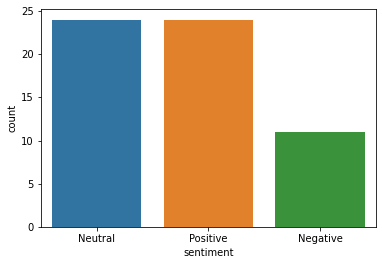

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot with seaborn
sns.countplot(parse['sentiment'])

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


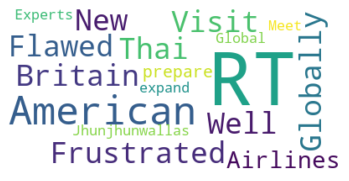

In [66]:
#most ofthe word used in a cloud form
text = " ".join(cat.split()[0] for cat in tweets_df.clean_tweet)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

